In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pygrib

# https://vlab.noaa.gov/web/mdl/ndfd-grid-data

In [2]:
!wget 'https://noaa-ndfd-pds.s3.amazonaws.com/opnl/AR.conus/VP.001-003/ds.temp.bin' -O forecast.bin

--2022-03-09 21:52:31--  https://noaa-ndfd-pds.s3.amazonaws.com/opnl/AR.conus/VP.001-003/ds.temp.bin
Resolving noaa-ndfd-pds.s3.amazonaws.com (noaa-ndfd-pds.s3.amazonaws.com)... 54.231.133.25
Connecting to noaa-ndfd-pds.s3.amazonaws.com (noaa-ndfd-pds.s3.amazonaws.com)|54.231.133.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47350889 (45M) [application/octet-stream]
Saving to: ‘forecast.bin’

forecast.bin        100%[===================>]  45.16M  9.44MB/s    in 5.0s    

2022-03-09 21:52:37 (9.00 MB/s) - ‘forecast.bin’ saved [47350889/47350889]



In [3]:
grbs = pygrib.open('forecast.bin')

In [4]:
grbs.seek(0)
for grb in grbs:
    print(grb)

1:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 30 mins:from 202203100430
2:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 90 mins:from 202203100430
3:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 150 mins:from 202203100430
4:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 210 mins:from 202203100430
5:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 270 mins:from 202203100430
6:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 330 mins:from 202203100430
7:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 390 mins:from 202203100430
8:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 450 mins:from 202203100430
9:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 510 mins:from 202203100430
10:2 metre temperature:K (instant):lamb

In [5]:
def grb_to_da(grb):
    values = grb.values[np.newaxis, ...]
    lat, lon = grb.latlons()
    t = grb.validDate
    analysis_date = grb.analDate
    parameter = grb.parameterName
    unit = grb.parameterUnits
    
    da = xr.DataArray(data=values,
                  dims=["time", "y", "x"],
                  coords=dict(
                      lon=(["y", "x"], lon),
                      lat=(["y", "x"], lat),
                      time=np.array(t)[..., np.newaxis]
                      ),
                  attrs=dict(
                      paramter=parameter,
                      unit=unit)
                 )
    return da

In [6]:
da = grb_to_da(grb)
da

<xarray.DataArray (time: 1, y: 1377, x: 2145)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
    lon      (y, x) float64 -121.6 -121.5 -121.5 -121.5 ... -60.95 -60.92 -60.89
    lat      (y, x) float64 20.19 20.2 20.2 20.21 ... 50.12 50.12 50.11 50.11
  * time     (time) datetime64[ns] 2022-03-13
Dimensions without coordinates: y, x
Attributes:
    paramter:  Temperature
    unit:      K

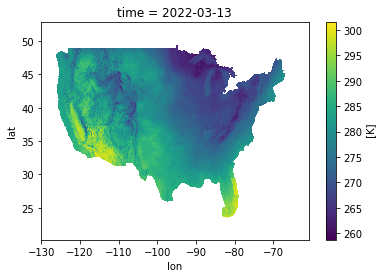

In [7]:
da.plot(x='lon', y='lat')

In [8]:
grbs.seek(0)
arrays = list()

for grb in grbs:
    da = grb_to_da(grb)
    arrays.append(da)

forecast_cube = xr.concat(arrays, dim="time")

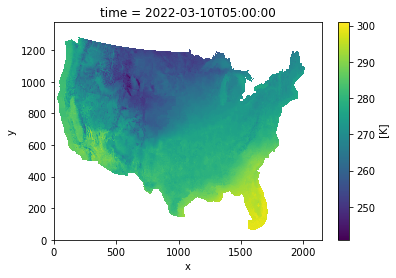

In [9]:
forecast_cube.isel(time=0).plot()

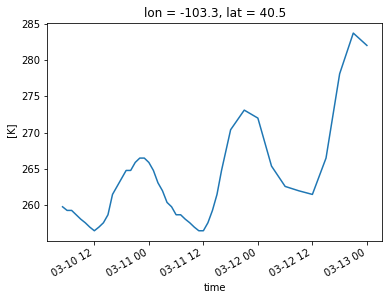

In [10]:
forecast_cube.isel(x=800, y=800).plot()

In [11]:
grb.keys()

['globalDomain',
 'GRIBEditionNumber',
 'tablesVersionLatestOfficial',
 'tablesVersionLatest',
 'grib2divider',
 'is_efas',
 'angleSubdivisions',
 'missingValue',
 'ieeeFloats',
 'isHindcast',
 'section0Length',
 'identifier',
 'discipline',
 'editionNumber',
 'totalLength',
 'sectionNumber',
 'section1Length',
 'numberOfSection',
 'centre',
 'centreDescription',
 'subCentre',
 'tablesVersion',
 'masterDir',
 'localTablesVersion',
 'significanceOfReferenceTime',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'dataDate',
 'julianDay',
 'dataTime',
 'productionStatusOfProcessedData',
 'typeOfProcessedData',
 'md5Section1',
 'selectStepTemplateInterval',
 'selectStepTemplateInstant',
 'stepType',
 'is_chemical',
 'is_chemical_distfn',
 'is_chemical_srcsink',
 'is_aerosol',
 'is_aerosol_optical',
 'setCalendarId',
 'deleteCalendarId',
 'is_uerra',
 'sectionNumber',
 'grib2LocalSectionPresent',
 'deleteLocalDefinition',
 'sectionNumber',
 'gridDescriptionSectionPresent',
 'secti

In [12]:
grb.values.shape

(1377, 2145)

In [13]:
grb.parameterUnits

'K'

In [14]:
grb.parameterName

'Temperature'